# Wind Farm Payments Exploration

I was amazed to see on the news in the last week that the government was paying wind farms to stop producing energy at a time when many people are freezing in their homes and climate change still represents the greeatest threat to humanity.

I thought that I would investigate this paradigm of paying companies to stop producing clean evergy through using some data science to analyse the data and draw some conclusions.

The areticle that originally piqued my intrest is this: https://www.telegraph.co.uk/news/2023/01/25/wind-farms-paid-switch-households-cut-back-energy-use/

I have been using a data set from 'https://www.ref.org.uk/constraints/indexbymth.php' to help with my research.

First we must import our dataset and clean it up so that it is of some use to us.

In [43]:
import pandas as pd
import seaborn as sns
from datetime import datetime
df = pd.read_html('https://www.ref.org.uk/constraints/indexbymth.php')[0]
df.head()

,Month,Cost,MWh,Average Price
0,2023-02,"£5,895,129",107245,£55
1,2023-01,"£16,172,738",278033,£58
2,2022-12,"£10,900,286",189328,£58
3,2022-11,"£31,613,631",487665,£65
4,2022-10,"£39,134,051",602250,£65


It is important to know that the columns have been abreviated. 
Month is self explanatory. 
Cost is the total cost that the UK government paid to wind farms to stop producing energy during the month listed. 
MWh is the amount of energy production that was stopped during the month listed.
Average Price is the average price that the UK government paid to wind farms to stop producing energy during the month listed per MWh.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          145 non-null    object
 1   Cost           145 non-null    object
 2   MWh            145 non-null    int64 
 3   Average Price  145 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.7+ KB


Now for a bit of cleaning so that our df is in a useable format.

In [7]:
df['Month'] = df['Month'].astype('str') 

In [8]:
df['Cost'] = df['Cost'].astype('str')

In [9]:
df['Cost'] = df.Cost.str[1:]

In [10]:
df['Cost'] = df['Cost'].str.replace(',', '')

In [11]:
df['Cost'] = df['Cost'].astype('int64')

In [13]:
df['Average Price'] = df['Average Price'].astype('str')

In [14]:
df['Average Price'] = df['Average Price'].str[1:]

In [15]:
df['Average Price'] = df['Average Price'].astype('int64')

In [16]:
df.head()

,Month,Cost,MWh,Average Price
0,2023-02,5895129,107245,55
1,2023-01,16172738,278033,58
2,2022-12,10900286,189328,58
3,2022-11,31613631,487665,65
4,2022-10,39134051,602250,65


Good, now that is done we can now explore some of the trends, first however we need to covert our string date to a datetime object.

In [17]:
def string_to_milliseconds(datetime_str):
    datetime_object = datetime.strptime(datetime_str, '%Y-%m')
    return datetime_object.timestamp() * 1000

In [18]:
df['Epoch Time'] = df.Month.apply(string_to_milliseconds)

In [19]:
df.head()

,Month,Cost,MWh,Average Price,Epoch Time
0,2023-02,5895129,107245,55,1.675210e+12
1,2023-01,16172738,278033,58,1.672531e+12
2,2022-12,10900286,189328,58,1.669853e+12
3,2022-11,31613631,487665,65,1.667261e+12
4,2022-10,39134051,602250,65,1.664579e+12


Now that we hace a properly formatted and useable dataset we can begin our visualisation of the data and its correlations

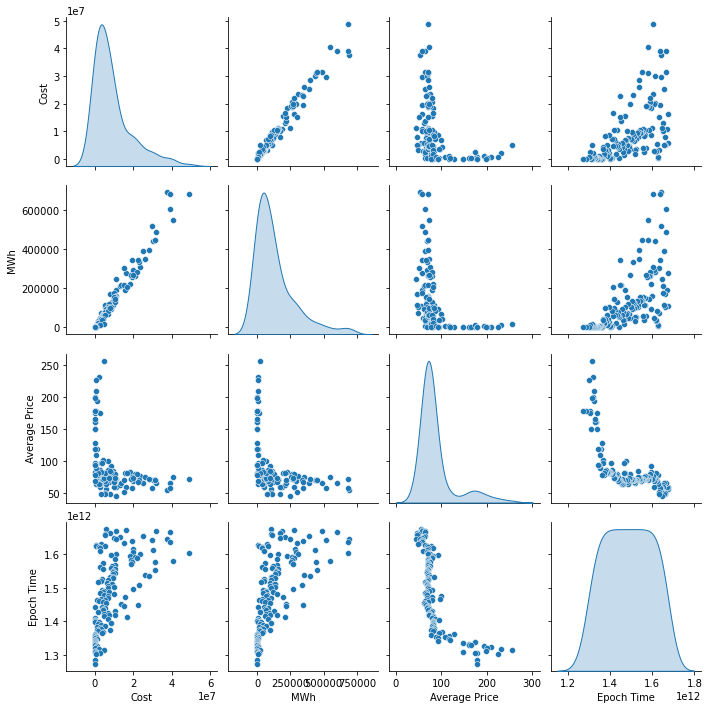

In [20]:
sns.pairplot(df,diag_kind='kde')

Looking at the correlations above, I think that the most interesting ones for me are in the right hand column to see how the MWh prodcution, average price per MWh and total payment costs are changing over time. 

I shall now show some of the trend lines that I feel appear in the data.

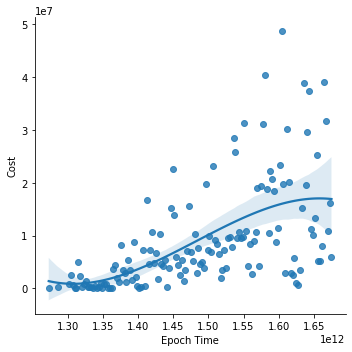

In [21]:
sns.lmplot(data=df, x = 'Epoch Time', y = 'Cost', order = 3)

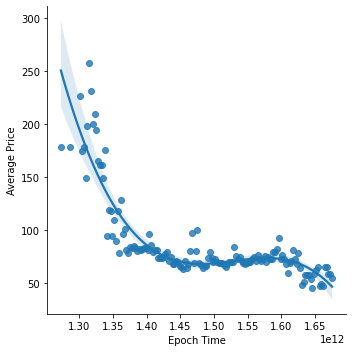

In [22]:
sns.lmplot(data=df, x = 'Epoch Time', y = 'Average Price', order = 3)

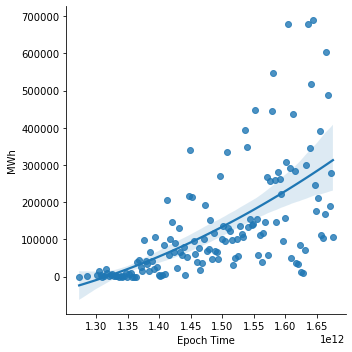

In [23]:
sns.lmplot(data=df, x = 'Epoch Time', y = 'MWh', order = 2)

In [24]:
df['Year'] = df.Month.str[0:4]
df.head()

,Month,Cost,MWh,Average Price,Epoch Time,Year
0,2023-02,5895129,107245,55,1.675210e+12,2023
1,2023-01,16172738,278033,58,1.672531e+12,2023
2,2022-12,10900286,189328,58,1.669853e+12,2022
3,2022-11,31613631,487665,65,1.667261e+12,2022
4,2022-10,39134051,602250,65,1.664579e+12,2022


In [25]:
df['Month'] = df.Month.str[5:]
df.head()

,Month,Cost,MWh,Average Price,Epoch Time,Year
0,02,5895129,107245,55,1.675210e+12,2023
1,01,16172738,278033,58,1.672531e+12,2023
2,12,10900286,189328,58,1.669853e+12,2022
3,11,31613631,487665,65,1.667261e+12,2022
4,10,39134051,602250,65,1.664579e+12,2022


In [27]:
df['Season'] = df.Month.apply(lambda x: 'Winter' if x in ['01','02','12'] else 'Spring' if x in ['03','04','05'] else 'Summer' if x in ['06','07','08'] else 'Autumn')
df.head()

,Month,Cost,MWh,Average Price,Epoch Time,Year,Season
0,02,5895129,107245,55,1.675210e+12,2023,Winter
1,01,16172738,278033,58,1.672531e+12,2023,Winter
2,12,10900286,189328,58,1.669853e+12,2022,Winter
3,11,31613631,487665,65,1.667261e+12,2022,Autumn
4,10,39134051,602250,65,1.664579e+12,2022,Autumn


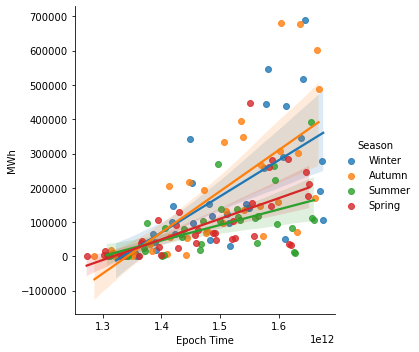

In [42]:
sns.lmplot(data=df, x = 'Epoch Time', y = 'MWh', hue = 'Season')

Looking at these trendlines it appears as if the UK's best wind producing time is the autumn and winter months. This is interesting as it is the time of year when the UK is most likely to need the most energy. I would think that wind is a better option in this case than solar.

In [29]:
df.head()

,Month,Cost,MWh,Average Price,Epoch Time,Year,Season
0,02,5895129,107245,55,1.675210e+12,2023,Winter
1,01,16172738,278033,58,1.672531e+12,2023,Winter
2,12,10900286,189328,58,1.669853e+12,2022,Winter
3,11,31613631,487665,65,1.667261e+12,2022,Autumn
4,10,39134051,602250,65,1.664579e+12,2022,Autumn


In [30]:
winter_df = df[df['Season'] == 'Winter']
spring_df = df[df['Season'] == 'Spring']
summer_df = df[df['Season'] == 'Summer']
autumn_df = df[df['Season'] == 'Autumn']

winter_df.head()

,Month,Cost,MWh,Average Price,Epoch Time,Year,Season
0,02,5895129,107245,55,1.675210e+12,2023,Winter
1,01,16172738,278033,58,1.672531e+12,2023,Winter
2,12,10900286,189328,58,1.669853e+12,2022,Winter
12,02,37413608,688481,54,1.643674e+12,2022,Winter
13,01,29681186,518074,57,1.640995e+12,2022,Winter


In [31]:
seasons = [winter_df, spring_df, summer_df, autumn_df]

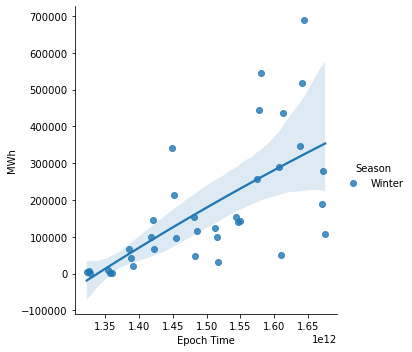

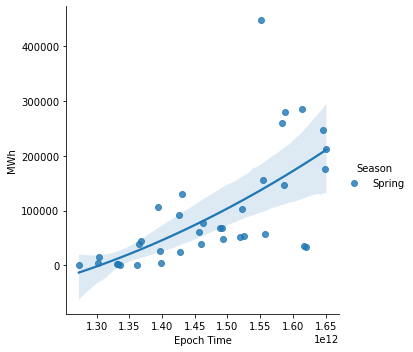

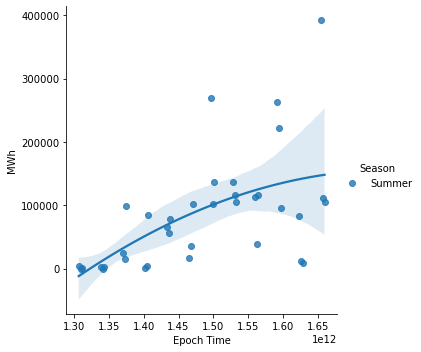

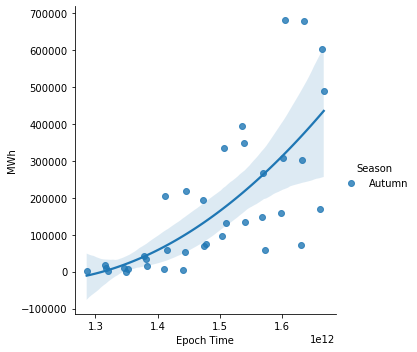

In [32]:
for season in seasons:
    sns.lmplot(data=season, x = 'Epoch Time', y = 'MWh', hue = 'Season', order = 2)

Looking at these graphs, it appears as if the power output of windfarms in the UK is both increasing over time, but becoming more variable

In [33]:
year_total_df = df.groupby('Year').sum()
year_total_df.head()

,Cost,MWh,Average Price,Epoch Time
Year,,,,
2010,174128,976,356,2.558556e+12
2011,12826756,58708,1822,1.180939e+13
2012,5924231,45464,1628,1.607798e+13
2013,32707352,379817,1095,1.645658e+13
2014,53261059,659350,988,1.683501e+13


<AxesSubplot:xlabel='Epoch Time', ylabel='MWh'>

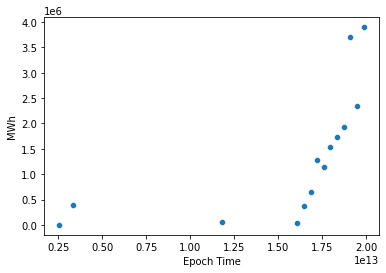

In [41]:
sns.scatterplot(data=year_total_df, x = 'Epoch Time', y = 'MWh')

We can see that there is a gradually increasing power output year on year from this graphic